## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
print('Number of rows in dataset: {}'.format(df.shape[0]))

Number of rows in dataset: 294478


c. The number of unique users in the dataset.

In [4]:
print('Number of unique users in dataset: {}'.format(df['user_id'].nunique()))

Number of unique users in dataset: 290584


d. The proportion of users converted.

In [5]:
print('Proportion of users converted: {}'.format(df.query('converted == 1').shape[0] / df.shape[0]))

Proportion of users converted: 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
wrong_control_new_page = df.query('landing_page == "new_page" & group == "control"').shape[0] 
wrong_treatment_old_page = df.query('landing_page == "old_page" & group == "treatment"').shape[0]
wrong_page_group = wrong_control_new_page + wrong_treatment_old_page
print('New page and treatment don\'t line up in {} rows'.format(wrong_page_group))

New page and treatment don't line up in 3893 rows


f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.drop(df.query('landing_page == "new_page" & group == "control"').index)
df2 = df2.drop(df2.query('landing_page == "old_page" & group == "treatment"').index)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
print('Number of unique user_ids in df2: {}'.format(df2['user_id'].nunique()))

Number of unique user_ids in df2: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2 = df2.drop(df2.query('user_id == 773192').index[0])

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
conversion_rate_all_pages = df2.query('converted == 1').shape[0] / df2.shape[0]
print('The probability of an individual converting regardless of the page is {}'.format(conversion_rate_all_pages))

The probability of an individual converting regardless of the page is 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
df_control_group = df2.query('group == "control"')
conversion_rate_control = df_control_group.query('converted == 1').shape[0] / df_control_group.shape[0]
print('The probability of an individual from the control group converting is {}'.format(conversion_rate_control))

The probability of an individual from the control group converting is 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
df_treatment_group = df2.query('group == "treatment"')
conversion_rate_treatment = df_treatment_group.query('converted == 1').shape[0] / df_treatment_group.shape[0]
print('The probability of an individual from the treatment group converting is {}'.format(conversion_rate_treatment))

The probability of an individual from the treatment group converting is 0.11880806551510564


d. What is the probability that an individual received the new page?

In [17]:
p_new_page = df2.query('landing_page == "new_page"').shape[0] / df2.shape[0]
print('Probability of an individual received the new page: {}'.format(p_new_page))

Probability of an individual received the new page: 0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Based on the probability of an individual receiving the new page (about 50%), we can see that both groups have almost the same number of occurences in the dataset. Also, when considering the probabilities of an individual converting regardless of the page, from the control group or from the treatment group, we can check that all these probabilities are pretty much the same (about 11,9%), such that we can affirm that we do not have sufficient evidence to state that the new treatment page leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**The null hypothesis would be**: **$p_{new}$** - **$p_{old}$** <= 0

**The alternative hypothesis would be**: **$p_{new}$** - **$p_{old}$** > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
print('Under the null hypothesis p_new is the same conversion rate regardless of the page: {}.'.format(conversion_rate_all_pages))

Under the null hypothesis p_new is the same conversion rate regardless of the page: 0.11959708724499628.


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
print('Under the null hypothesis p_old is the same conversion rate regardless of the page: {}.'.format(conversion_rate_all_pages))

Under the null hypothesis p_old is the same conversion rate regardless of the page: 0.11959708724499628.


c. What is $n_{new}$?

In [20]:
n_new = df2.query('landing_page == "new_page"').shape[0]
print('Number of occurrences for landing_page == "new_page": {}'.format(n_new))

Number of occurrences for landing_page == "new_page": 145310


d. What is $n_{old}$?

In [21]:
n_old = df2.query('landing_page == "old_page"').shape[0]
print('Number of occurrences for landing_page == "old_page": {}'.format(n_old))

Number of occurrences for landing_page == "old_page": 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.choice([0,1], n_new, p=[conversion_rate_all_pages, 1-conversion_rate_all_pages])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice([0,1], n_old, p=[conversion_rate_all_pages, 1-conversion_rate_all_pages])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
new_page_converted.mean() - old_page_converted.mean()

-0.00032145890867507632

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0,1], n_new, p=[conversion_rate_all_pages, 1-conversion_rate_all_pages])
    old_page_converted = np.random.choice([0,1], n_old, p=[conversion_rate_all_pages, 1-conversion_rate_all_pages])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([    5.,    55.,   387.,  1480.,  2838.,  2915.,  1690.,   516.,
          108.,     6.]),
 array([ -4.87768131e-03,  -3.91685485e-03,  -2.95602839e-03,
         -1.99520192e-03,  -1.03437546e-03,  -7.35489952e-05,
          8.87277469e-04,   1.84810393e-03,   2.80893040e-03,
          3.76975686e-03,   4.73058332e-03]),
 <a list of 10 Patch objects>)

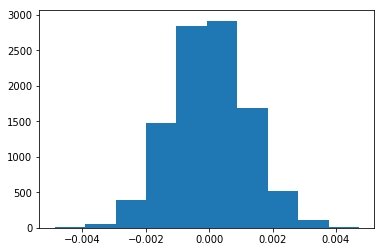

In [28]:
plt.hist(p_diffs)

**This plot shows that if the differences are generated from the null hypothesis they should follow a normal distribution by the central limit theorem, looking what is expected.**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
actual_diff = conversion_rate_treatment - conversion_rate_control
actual_diff

-0.0015782389853555567

In [30]:
s = (p_diffs > actual_diff)
null_prop = np.where(s == True)[0].size / p_diffs.size
print('Proportion of p_diffs greater than the actual difference: {}'.format(null_prop))

Proportion of p_diffs greater than the actual difference: 0.9089


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In part j we have computed the p-value, meaning for this example that with current data and a type-I error rate of 0.05, we fail to reject the null hypothesis, that is, we do not have statistical significance to suggest that the new page has a higher conversion rate than the old page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page" and converted == 1').shape[0]
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

/Users/resilva87/Apps/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')

In [33]:
p_value

0.90505831275902449

In [34]:
z_score

-1.3109241984234394

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Both the z-score (which is a statistical significant value that can helps us deciding whether or not to reject the null hypothesis) and p-value indicate that for our data we fail to reject the null hypothesis: first, because the p-value is above the alpha error rate; second, because the computed z-score is within the range of 1.96, which is the critical range of values at 95% confidence.**

**With this information, we can check this finding agrees with parts j and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We should perform a logistic regression in this case, because we are dealing with a categorical response variable.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
df2[['control_group', 'ab_page']] = pd.get_dummies(df2['group'])
df2 = df2.drop('control_group', axis=1)

In [36]:
df2['intercept']  = 1

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [37]:
model1 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results1 = model1.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 08 Sep 2018   Pseudo R-squ.:               8.077e-06
Time:                        19:49:22   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value associated with ab_page is 0.190**

**This value differs from the one in Part II because we have different hypotheses:**

**- In Part II: the hypothesis is that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, making it a right-tailed test (with a pvalue of $pvalue_{right}$).**

**- In this section: By defining a logistic regression model, we can see that null hypothesis is that there is no difference between the conversion rate from the control group and treatment group; while the alternative is that there is a statistical difference between these two proportions, making it a two-tailed test.**

**The p-value from the two-tailed test should equal $2 * (1 - pvalue_{right})$, which we can confirm with the provided data for this analysis $(0.190 = 2 * (1 - 0.905))$**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Advantages: The main advantage of considering several factors in our model is that we can find which of them are confounding factors: they could influence both our predictors and the response variable and could interfere on how we would check the main effect of an predictor on the response variable (in our case, the main predictor being the pages). Another advantage is that we can define a better prediction model, or find which inputs are best to predict the response variable.**

**Disadvantages: Our model would become very complex to interpret correctly and we may have several problems such as not even having a linear relationship between our predictors and response variable, correlated errors or multicollinearity (our predictor variables are dependent with one another). Another disadvantage is that our model is highly susceptable to the curse of dimensionality: with a given sample size we have a maximum number of features/factors that our predictor model will start to degrade, losing statistical significance.
So for instance in our model, adding other factors such as time of day or interactions could cause our regression model to degrade its performance.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [39]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [40]:
### Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])

In [41]:
# Define the baseline as (group=control/country=CA)
df_new = df_new.drop('CA', axis=1)

In [42]:
model2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US']])
results2 = model2.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [43]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 08 Sep 2018   Pseudo R-squ.:               2.323e-05
Time:                        19:49:35   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [44]:
1/np.exp(-0.0149), np.exp(0.0506), np.exp(0.0408)

(1.0150115583846535, 1.0519020483004984, 1.0416437559600236)

**Based on the result summary, we have follow interpretations**

- Holding all other variables constant, for every unit increase in UK, the conversion rate should increase by 1.051 from control group / country CA
- Holding all other variables constant, for every unit increase in US, the conversion rate should increase by 1.041 from control group / country CA
- Holding all other variables constant, for every unit decrease in treatment (ab_page), the conversion rate should increase by 1.015 from control group / country CA
- All variables (except the intercept) have p_value above the type-I error rate and Z-score in the boundaries of the critical value, meaning they're not  statistically significant for the prediction of conversion rate

In [45]:
#Define two interaction variables between ab_page and countries (US and UK)
df_new['US_ab_page'] = df_new['ab_page'] * df_new['US']
df_new['UK_ab_page'] = df_new['ab_page'] * df_new['UK']

# Keep the variables of lower order
model3 = sm.Logit(df_new['converted'], df_new[['intercept', 'US_ab_page', 'UK_ab_page','ab_page', 'UK', 'US']])
results3 = model3.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [46]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 08 Sep 2018   Pseudo R-squ.:               3.482e-05
Time:                        19:49:45   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
==============================================================================
"""

In [47]:
np.exp(0.0469), np.exp(0.0783), 1/np.exp(-0.0674), np.exp(0.0118), np.exp(0.0175)

(1.0480172021191829,
 1.0814470441230692,
 1.0697232819209153,
 1.011869894648401,
 1.0176540221507617)

**Based on the result summary, we have follow interpretations:**

- Holding all other variables constant, for every unit increase in UK, the conversion rate should increase by 1.011 from control group / country CA
- Holding all other variables constant, for every unit increase in US, the conversion rate should increase by 1.017 from control group / country CA
- Holding all other variables constant, for every unit increase in UK in the treatment group, the conversion rate should increase by 1.081 from control group / country CA
- Holding all other variables constant, for every unit increase in US in the treatment group, the conversion rate should increase by 1.048 from control group / country CA
- Holding all other variables constant, for every unit decrease in treatment (ab_page), the conversion rate should increase by 1.069 from control group / country CA
- All variables (except the intercept) have p_value above the type-I error rate and Z-score in the boundaries of the critical value, meaning they're not  statistically significant for the prediction of conversion rate

## Conclusion

Based on the results from the A/B test and regression models, we can state that we have enough **statistical evidence** to fail to reject the null hypothesis, concluding that **we have evidence to keep the old page instead of replacing it with the new page** based on its conversion rate performance.

## Bonus 

### Influences associated with time on conversion

This section investigates the influence of time on the conversion rate. Basically, we can label the time of the day (based on the **timestamp** column) with the values "morning", "afternoon" and "evening" and then check if these categorical variables have any influence on conversion.

In [48]:
df2['as_date'] = pd.to_datetime(df2['timestamp'])

In [49]:
import datetime

morning_start, morning_end = datetime.time(0,1,0), datetime.time(12,0,0)
afternoon_start, afternoon_end = datetime.time(12,1,0), datetime.time(18,0,0)

def label_time_of_day(d):
    hour = d.hour
    minute = d.minute
    d = datetime.time(hour, minute, 0)
    if morning_start <= d <= morning_end:
        return 'morning'
    elif afternoon_start <= d <= afternoon_end:
        return 'afternoon'
    return 'evening'

In [50]:
df2['time_of_day'] = df2['as_date'].apply(label_time_of_day)

In [51]:
df2[['afternoon', 'evening', 'morning']] = pd.get_dummies(df2['time_of_day'])
df2 = df2.drop('morning', axis=1)

In [52]:
# Baseline (time_of_day = morning)
model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'afternoon', 'evening']])
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


In [53]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 08 Sep 2018   Pseudo R-squ.:               2.704e-05
Time:                        19:50:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1243
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0002      0.010   -201.816      0.000      -2.020      -1.981
ab_page       -0.0150      0.011     -1.312      0.189      -0.037       0.007
afternoon      0.0202      0.014      1.446      0.148      -0.007       0.048
evening        0.0252      0.014      1.801      0.072      -0.002       0.053
==============================================================================
"""

In [54]:
1/np.exp(-0.0150), np.exp(0.0202), np.exp(0.0252)

(1.0151130646157189, 1.0204054007001484, 1.0255202040562033)

**Based on the result summary, we have follow interpretations:**

- Holding all other variables constant, for every unit decrease in treatment (ab_page), the conversion rate should increase by 1.015 from control group / morning
- Holding all other variables constant, for every unit increase in afternoon, the conversion rate should increase by 1.020 from control group / morning
- Holding all other variables constant, for every unit increase in evening, the conversion rate should increase by 1.025 from control group / morning
- All variables (except the intercept) have p_value above the type-I error rate and Z-score in the boundaries of the critical value, meaning they're not  statistically significant for the prediction of conversion rate

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.